In [13]:
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import seaborn as sns
import patsy
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.grid_search import GridSearchCV
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.cross_validation import cross_val_predict
import statsmodels.api as sm

## PART 3a. MODEL SELECTION FOR FEMALES

In [14]:
df=pd.read_csv('/Users/Marina/Documents/GA Data Science/projects/projects-capstone/clean_data.csv')

In [15]:
df_female=df.loc[df['gender'] == "Female"]

In [16]:
# col_female=['attr_o', 'like_o','prob_o','pf_o_att','shar_o','pf_o_int','shar2_1','fun_o','pf_o_fun',\
#            'clubbing','gaming','concerts','age_o','intel1_1','pf_o_sha','music','round']

col_female=['pf_o_att','attr_o', 'shar_o','like_o','pf_o_sha','prob_o','pf_o_fun','pf_o_sin','pf_o_int','fun_o','shar2_1',\
           'age_o','age','round','pf_o_amb','amb_o','intel2_1','intel1_1']

data_female=df_female[col_female]

# 'clubbing','attr1_1','music'
len(data_female)

2999

In [17]:
from sklearn.preprocessing import StandardScaler
x=data_female

X_norm =  StandardScaler().fit_transform(x);

df_stand=pd.DataFrame(X_norm, columns=data_female.columns)
df_stand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 18 columns):
pf_o_att    2999 non-null float64
attr_o      2999 non-null float64
shar_o      2999 non-null float64
like_o      2999 non-null float64
pf_o_sha    2999 non-null float64
prob_o      2999 non-null float64
pf_o_fun    2999 non-null float64
pf_o_sin    2999 non-null float64
pf_o_int    2999 non-null float64
fun_o       2999 non-null float64
shar2_1     2999 non-null float64
age_o       2999 non-null float64
age         2999 non-null float64
round       2999 non-null float64
pf_o_amb    2999 non-null float64
amb_o       2999 non-null float64
intel2_1    2999 non-null float64
intel1_1    2999 non-null float64
dtypes: float64(18)
memory usage: 421.8 KB


In [18]:
# categ_female= ['pid','dec']

categ_female= ['dec','field_cd']
df_female_cat=df_female[categ_female]

len(df_female_cat)


2999

In [19]:




X = patsy.dmatrix('~ C(dec)+C(field_cd)', df_female_cat)

df_cat=pd.DataFrame(X, columns=X.design_info.column_names)
len(X)

2999

In [20]:
df_female_final = pd.concat([df_cat, df_stand], axis=1)
len(df_female_final)

2999

In [21]:
y_female = df_female.match

#y_male = y_male.map(lambda x: 'no' if x ==0 else 'yes')

y_female = y_female.values

y_female

array([0, 0, 1, ..., 0, 0, 0])

In [22]:
# X_female=df_female_final
X_female=df_female_final

In [23]:

X_female.shape

(2999, 35)

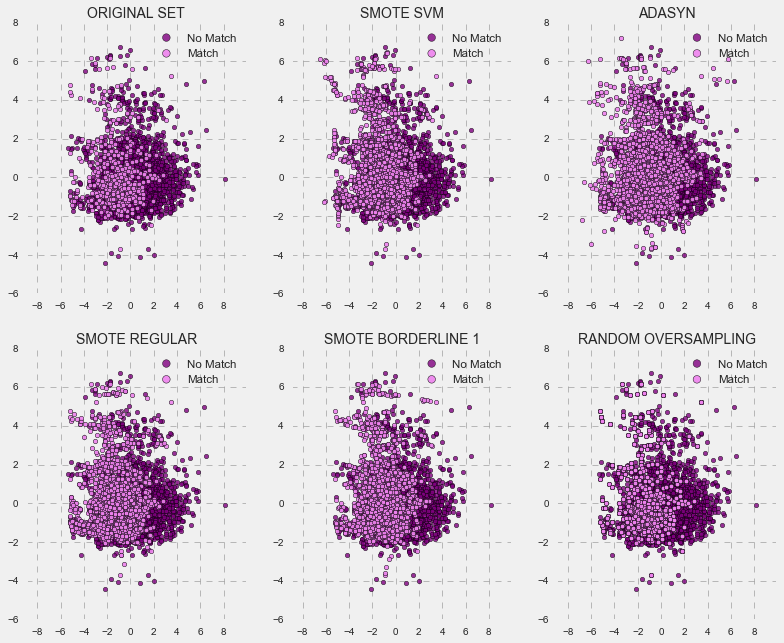

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

from imblearn.over_sampling import SMOTE, ADASYN,RandomOverSampler
#plt.style.use(['fivethirtyeight','bmh'])

plt.style.use(['fivethirtyeight'])
pca = PCA(n_components=2)
X_vis = pca.fit_transform(X_female)


fig, ax = plt.subplots(2,3, figsize=(12,10))

ax[0][0].scatter(X_vis[y_female == 0, 0], X_vis[y_female == 0, 1], label="No Match", alpha=0.8,
            edgecolor='black', linewidth=0.50,color='purple',s=20)
ax[0][0].scatter(X_vis[y_female == 1, 0], X_vis[y_female == 1, 1], label="Match", alpha=0.9,
            edgecolor='black', linewidth=0.50,color='violet',s=20)
ax[0][0].set_title('ORIGINAL SET',fontsize = 14)
ax[0][0].grid(color='gray', linestyle='--', alpha=.5)
ax[0][0].legend(loc='best', fontsize = 11.5,markerscale=1.7)
ax[0][0].set_xticks(range(-8,9, 2))
ax[0][0].set_xlim([-9, 10])
# for tick in ax[0][0].get_xticklabels():
#     tick.set_rotation(45)



sm = SMOTE(kind='svm')
X_resampled1, y_resampled1 = sm.fit_sample(X_female, y_female)
X_res_vis1 = pca.transform(X_resampled1)

ax[0][1].scatter(X_res_vis1[y_resampled1 == 0, 0], X_res_vis1[y_resampled1 == 0, 1],
            label="No Match", alpha=0.8,edgecolor='black', linewidth=0.50,color='purple',s=20)
ax[0][1].scatter(X_res_vis1[y_resampled1 == 1, 0], X_res_vis1[y_resampled1 == 1, 1],
            label="Match", alpha=0.9,edgecolor='black', linewidth=0.50,color='violet',s=20)
ax[0][1].set_title('SMOTE SVM',fontsize = 14)
ax[0][1].grid(color='gray', linestyle='--', alpha=.5)
ax[0][1].legend(loc='best', fontsize = 11.5,markerscale=1.7)
ax[0][1].set_xticks(range(-8,9, 2))
ax[0][1].set_xlim([-9, 10])

ada = ADASYN()
X_resampled2, y_resampled2 = ada.fit_sample(X_female, y_female)
X_res_vis2 = pca.transform(X_resampled2)

ax[0][2].scatter(X_res_vis2[y_resampled2 == 0, 0], X_res_vis2[y_resampled2 == 0, 1],
            label="No Match", alpha=0.8,edgecolor='black', linewidth=0.50,color='purple',s=20)
ax[0][2].scatter(X_res_vis2[y_resampled2 == 1, 0], X_res_vis2[y_resampled2 == 1, 1],
            label="Match", alpha=0.9,edgecolor='black', linewidth=0.50,color='violet',s=20)
ax[0][2].set_title('ADASYN',fontsize = 14)
ax[0][2].grid(color='gray', linestyle='--', alpha=.5)
ax[0][2].legend(loc='best', fontsize = 11.5,markerscale=1.7)
ax[0][2].set_xticks(range(-8,9, 2))
ax[0][2].set_xlim([-9, 10])

sm = SMOTE(kind='regular')
X_resampled3, y_resampled3 = sm.fit_sample(X_female, y_female)
X_res_vis3 = pca.transform(X_resampled3)

ax[1][0].scatter(X_res_vis3[y_resampled3 == 0, 0], X_res_vis3[y_resampled3 == 0, 1],
            label="No Match",  alpha=0.8,edgecolor='black', linewidth=0.50,color='purple',s=20)
ax[1][0].scatter(X_res_vis3[y_resampled3 == 1, 0], X_res_vis3[y_resampled3 == 1, 1],
            label="Match", alpha=0.9,edgecolor='black', linewidth=0.50,color='violet',s=20)
ax[1][0].set_title('SMOTE REGULAR', fontsize = 14)
ax[1][0].grid(color='gray', linestyle='--', alpha=.5)
ax[1][0].legend(loc='best', fontsize = 11.5,markerscale=1.7)
ax[1][0].set_xticks(range(-8,9, 2))
ax[1][0].set_xlim([-9, 10])

sm = SMOTE(kind='borderline1')
X_resampled4, y_resampled4 = sm.fit_sample(X_female, y_female)
X_res_vis4 = pca.transform(X_resampled4)

ax[1][1].scatter(X_res_vis4[y_resampled4 == 0, 0], X_res_vis4[y_resampled4 == 0, 1],
            label="No Match",  alpha=0.8,edgecolor='black', linewidth=0.50,color='purple',s=20)
ax[1][1].scatter(X_res_vis4[y_resampled4 == 1, 0], X_res_vis4[y_resampled4 == 1, 1],
            label="Match", alpha=0.9,edgecolor='black', linewidth=0.50,color='violet',s=20)
ax[1][1].set_title('SMOTE BORDERLINE 1', fontsize = 14)
ax[1][1].grid(color='gray', linestyle='--', alpha=.5)
ax[1][1].legend(loc='best', fontsize = 11.5,markerscale=1.7)
ax[1][1].set_xticks(range(-8,9, 2))
ax[1][1].set_xlim([-9, 10])

ros = RandomOverSampler()
X_resampled5, y_resampled5 = ros.fit_sample(X_female, y_female)
X_res_vis5 = pca.transform(X_resampled5)

ax[1][2].scatter(X_res_vis5[y_resampled5 == 0, 0], X_res_vis5[y_resampled5 == 0, 1],
            label="No Match",  alpha=0.8,edgecolor='black', linewidth=0.50,color='purple',s=20)
ax[1][2].scatter(X_res_vis5[y_resampled5 == 1, 0], X_res_vis5[y_resampled5 == 1, 1],
            label="Match", alpha=0.9,edgecolor='black', linewidth=0.50,color='violet',s=20)
ax[1][2].set_title('RANDOM OVERSAMPLING',  fontsize = 14)
ax[1][2].grid(color='gray', linestyle='--', alpha=.5)
ax[1][2].legend(loc='best', fontsize = 11.5,markerscale=1.7)
ax[1][2].set_xticks(range(-8,9, 2))
ax[1][2].set_xlim([-9, 10])
plt.show()

### Modeling with Original Set

In [43]:
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X_female, y_female,
                                                    train_size=0.7,
                                                    random_state=10,
                                                    stratify=y_female)

cv_train = StratifiedKFold(y_train, n_folds=10, shuffle=True, random_state=10)
cv_test = StratifiedKFold(y_test, n_folds=10, shuffle=True, random_state=10)

lg= LogisticRegression(random_state=10)
dt = DecisionTreeClassifier(class_weight='balanced',min_samples_split=50,random_state=10)
bdt = BaggingClassifier(DecisionTreeClassifier(random_state=10),random_state=10)
rf = RandomForestClassifier(class_weight='balanced', n_jobs=-1,random_state=10)
et = ExtraTreesClassifier(class_weight='balanced', n_jobs=-1,random_state=10)
abc = AdaBoostClassifier(random_state=10)
gbst = GradientBoostingClassifier(random_state=10)
bnb = BernoulliNB()
svc = SVC(kernel='linear',probability=True,random_state=10)




def score(model, name):
    train_score = cross_val_score(model, X_train, y_train, cv=cv_train, n_jobs=-1)
    test_score = cross_val_score(model, X_test, y_test, cv=cv_test, n_jobs=-1)
    print "{} Training Accuracy Score:\t{:0.3} ± {:0.3}".format(name, train_score.mean().round(3),\
                                                                train_score.std().round(3))
    print "{} Test Accuracy Score:\t{:0.3} ± {:0.3}".format(name, test_score.mean().round(3),\
                                                                test_score.std().round(3))
    print " "
        
score(dt,"Decision Tree")
score(lg, "Logistic Regres")
score(bdt, "Bagging DT")
score(rf, "Random Forest")
score(et, "Extra Trees")
score(abc, "Ada Boost")
score(gbst, "Grad Boosting")
score(bnb, "Bernoulli NB")
score(svc, "SVC")


Decision Tree Training Accuracy Score:	0.886 ± 0.029
Decision Tree Test Accuracy Score:	0.872 ± 0.044
 
Logistic Regres Training Accuracy Score:	0.917 ± 0.02
Logistic Regres Test Accuracy Score:	0.909 ± 0.028
 
Bagging DT Training Accuracy Score:	0.921 ± 0.018
Bagging DT Test Accuracy Score:	0.9 ± 0.032
 
Random Forest Training Accuracy Score:	0.905 ± 0.011
Random Forest Test Accuracy Score:	0.886 ± 0.041
 
Extra Trees Training Accuracy Score:	0.907 ± 0.011
Extra Trees Test Accuracy Score:	0.897 ± 0.027
 
Ada Boost Training Accuracy Score:	0.919 ± 0.013
Ada Boost Test Accuracy Score:	0.894 ± 0.037
 
Grad Boosting Training Accuracy Score:	0.928 ± 0.014
Grad Boosting Test Accuracy Score:	0.91 ± 0.03
 
Bernoulli NB Training Accuracy Score:	0.911 ± 0.013
Bernoulli NB Test Accuracy Score:	0.898 ± 0.032
 
SVC Training Accuracy Score:	0.921 ± 0.022
SVC Test Accuracy Score:	0.918 ± 0.029
 


### Modeling with SMOT SVC

In [44]:
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X_resampled1, y_resampled1,
                                                    train_size=0.7,
                                                    random_state=10,
                                                    stratify=y_resampled1)

cv_train = StratifiedKFold(y_train, n_folds=10, shuffle=True, random_state=10)
cv_test = StratifiedKFold(y_test, n_folds=10, shuffle=True, random_state=10)

lg1= LogisticRegression(random_state=10)
dt1 = DecisionTreeClassifier(class_weight='balanced',min_samples_split=50,random_state=10)
bdt1 = BaggingClassifier(DecisionTreeClassifier(random_state=10),random_state=10)
rf1 = RandomForestClassifier(class_weight='balanced', n_jobs=-1,random_state=10)
et1= ExtraTreesClassifier(class_weight='balanced', n_jobs=-1,random_state=10)
abc1 = AdaBoostClassifier(random_state=10)
gbst1 = GradientBoostingClassifier(random_state=10)
bnb1 = BernoulliNB()
svc1 = SVC(kernel='linear',probability=True,random_state=10)




def score(model, name):
    train_score = cross_val_score(model, X_train, y_train, cv=cv_train, n_jobs=-1)
    test_score = cross_val_score(model, X_test, y_test, cv=cv_test, n_jobs=-1)
    print "{} Training Accuracy Score:\t{:0.3} ± {:0.3}".format(name, train_score.mean().round(3),\
                                                                train_score.std().round(3))
    print "{} Test Accuracy Score:\t{:0.3} ± {:0.3}".format(name, test_score.mean().round(3),\
                                                                test_score.std().round(3))
    print " "
        
score(dt1,"Decision Tree")
score(lg1, "Logistic Regres")
score(bdt1, "Bagging DT")
score(rf1, "Random Forest")
score(et1, "Extra Trees")
score(abc1, "Ada Boost")
score(gbst1, "Grad Boosting")
score(bnb1, "Bernoulli NB")
score(svc1, "SVC")

Decision Tree Training Accuracy Score:	0.935 ± 0.009
Decision Tree Test Accuracy Score:	0.918 ± 0.026
 
Logistic Regres Training Accuracy Score:	0.933 ± 0.011
Logistic Regres Test Accuracy Score:	0.919 ± 0.025
 
Bagging DT Training Accuracy Score:	0.946 ± 0.01
Bagging DT Test Accuracy Score:	0.938 ± 0.017
 
Random Forest Training Accuracy Score:	0.95 ± 0.006
Random Forest Test Accuracy Score:	0.939 ± 0.017
 
Extra Trees Training Accuracy Score:	0.959 ± 0.008
Extra Trees Test Accuracy Score:	0.94 ± 0.017
 
Ada Boost Training Accuracy Score:	0.945 ± 0.012
Ada Boost Test Accuracy Score:	0.944 ± 0.019
 
Grad Boosting Training Accuracy Score:	0.952 ± 0.009
Grad Boosting Test Accuracy Score:	0.942 ± 0.024
 
Bernoulli NB Training Accuracy Score:	0.901 ± 0.014
Bernoulli NB Test Accuracy Score:	0.89 ± 0.036
 
SVC Training Accuracy Score:	0.933 ± 0.012
SVC Test Accuracy Score:	0.919 ± 0.021
 


### Modeling with ADASYN

In [45]:
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X_resampled2, y_resampled2,
                                                    train_size=0.7,
                                                    random_state=10,
                                                    stratify=y_resampled2)

cv_train = StratifiedKFold(y_train, n_folds=10, shuffle=True, random_state=10)
cv_test = StratifiedKFold(y_test, n_folds=10, shuffle=True, random_state=10)

lg2= LogisticRegression(random_state=10)
dt2 = DecisionTreeClassifier(class_weight='balanced',min_samples_split=50,random_state=10)
bdt2 = BaggingClassifier(DecisionTreeClassifier(random_state=10),random_state=10)
rf2 = RandomForestClassifier(class_weight='balanced', n_jobs=-1,random_state=10)
et2 = ExtraTreesClassifier(class_weight='balanced', n_jobs=-1,random_state=10)
abc2 = AdaBoostClassifier(random_state=10)
gbst2 = GradientBoostingClassifier(random_state=10)
bnb2 = BernoulliNB()
svc2 = SVC(kernel='linear',probability=True,random_state=10)




def score(model, name):
    train_score = cross_val_score(model, X_train, y_train, cv=cv_train, n_jobs=-1)
    test_score = cross_val_score(model, X_test, y_test, cv=cv_test, n_jobs=-1)
    print "{} Training Accuracy Score:\t{:0.3} ± {:0.3}".format(name, train_score.mean().round(3),\
                                                                train_score.std().round(3))
    print "{} Test Accuracy Score:\t{:0.3} ± {:0.3}".format(name, test_score.mean().round(3),\
                                                                test_score.std().round(3))
    print " "
        
score(dt2,"Decision Tree")
score(lg2, "Logistic Regres")
score(bdt2, "Bagging DT")
score(rf2, "Random Forest")
score(et2, "Extra Trees")
score(abc2, "Ada Boost")
score(gbst2, "Grad Boosting")
score(bnb2, "Bernoulli NB")
score(svc2, "SVC")

Decision Tree Training Accuracy Score:	0.93 ± 0.014
Decision Tree Test Accuracy Score:	0.885 ± 0.028
 
Logistic Regres Training Accuracy Score:	0.922 ± 0.009
Logistic Regres Test Accuracy Score:	0.916 ± 0.024
 
Bagging DT Training Accuracy Score:	0.949 ± 0.013
Bagging DT Test Accuracy Score:	0.929 ± 0.017
 
Random Forest Training Accuracy Score:	0.961 ± 0.006
Random Forest Test Accuracy Score:	0.932 ± 0.016
 
Extra Trees Training Accuracy Score:	0.962 ± 0.01
Extra Trees Test Accuracy Score:	0.927 ± 0.016
 
Ada Boost Training Accuracy Score:	0.943 ± 0.007
Ada Boost Test Accuracy Score:	0.934 ± 0.013
 
Grad Boosting Training Accuracy Score:	0.948 ± 0.01
Grad Boosting Test Accuracy Score:	0.934 ± 0.016
 
Bernoulli NB Training Accuracy Score:	0.896 ± 0.017
Bernoulli NB Test Accuracy Score:	0.874 ± 0.022
 
SVC Training Accuracy Score:	0.922 ± 0.009
SVC Test Accuracy Score:	0.91 ± 0.022
 


### Modeling with SMOT REGULAR

In [25]:
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X_resampled3, y_resampled3,
                                                    train_size=0.7,
                                                    random_state=10,
                                                    stratify=y_resampled5)

cv_train = StratifiedKFold(y_train, n_folds=10, shuffle=True, random_state=10)
cv_test = StratifiedKFold(y_test, n_folds=10, shuffle=True, random_state=10)

lg3= LogisticRegression(random_state=10)
dt3 = DecisionTreeClassifier(class_weight='balanced',min_samples_split=50,random_state=10)
bdt3 = BaggingClassifier(DecisionTreeClassifier(random_state=10),random_state=10)
rf3 = RandomForestClassifier(class_weight='balanced', n_jobs=-1,random_state=10)
et3 = ExtraTreesClassifier(class_weight='balanced', n_jobs=-1,random_state=10)
abc3 = AdaBoostClassifier(random_state=10)
gbst3 = GradientBoostingClassifier(random_state=10)
bnb3 = BernoulliNB()
svc3 = SVC(kernel='linear',probability=True,random_state=10)




def score(model, name):
    train_score = cross_val_score(model, X_train, y_train, cv=cv_train, n_jobs=-1)
    test_score = cross_val_score(model, X_test, y_test, cv=cv_test, n_jobs=-1)
    print "{} Training Accuracy Score:\t{:0.3} ± {:0.3}".format(name, train_score.mean().round(3),\
                                                                train_score.std().round(3))
    print "{} Test Accuracy Score:\t{:0.3} ± {:0.3}".format(name, test_score.mean().round(3),\
                                                                test_score.std().round(3))
    print " "
        
score(dt3,"Decision Tree")
score(lg3, "Logistic Regres")
score(bdt3, "Bagging DT")
score(rf3, "Random Forest")
score(et3, "Extra Trees")
score(abc3, "Ada Boost")
score(gbst3, "Grad Boosting")
score(bnb3, "Bernoulli NB")
score(svc3, "SVC")

Decision Tree Training Accuracy Score:	0.927 ± 0.017
Decision Tree Test Accuracy Score:	0.911 ± 0.021
 
Logistic Regres Training Accuracy Score:	0.933 ± 0.014
Logistic Regres Test Accuracy Score:	0.921 ± 0.019
 
Bagging DT Training Accuracy Score:	0.946 ± 0.015
Bagging DT Test Accuracy Score:	0.934 ± 0.022
 
Random Forest Training Accuracy Score:	0.957 ± 0.01
Random Forest Test Accuracy Score:	0.937 ± 0.016
 
Extra Trees Training Accuracy Score:	0.96 ± 0.008
Extra Trees Test Accuracy Score:	0.943 ± 0.015
 
Ada Boost Training Accuracy Score:	0.948 ± 0.01
Ada Boost Test Accuracy Score:	0.937 ± 0.027
 
Grad Boosting Training Accuracy Score:	0.955 ± 0.012
Grad Boosting Test Accuracy Score:	0.945 ± 0.022
 
Bernoulli NB Training Accuracy Score:	0.894 ± 0.019
Bernoulli NB Test Accuracy Score:	0.894 ± 0.024
 
SVC Training Accuracy Score:	0.929 ± 0.015
SVC Test Accuracy Score:	0.921 ± 0.016
 


### Modeling with SMOT BORDELINE 1

In [47]:
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X_resampled4, y_resampled4,
                                                    train_size=0.7,
                                                    random_state=10,
                                                    stratify=y_resampled4)

cv_train = StratifiedKFold(y_train, n_folds=10, shuffle=True, random_state=10)
cv_test = StratifiedKFold(y_test, n_folds=10, shuffle=True, random_state=10)

lg4= LogisticRegression(random_state=10)
dt4 = DecisionTreeClassifier(class_weight='balanced',min_samples_split=50,random_state=10)
bdt4 = BaggingClassifier(DecisionTreeClassifier(random_state=10),random_state=10)
rf4 = RandomForestClassifier(class_weight='balanced', n_jobs=-1,random_state=10)
et4 = ExtraTreesClassifier(class_weight='balanced', n_jobs=-1,random_state=10)
abc4 = AdaBoostClassifier(random_state=10)
gbst4 = GradientBoostingClassifier(random_state=10)
bnb4 = BernoulliNB()
svc4 = SVC(kernel='linear',probability=True,random_state=10)




def score(model, name):
    train_score = cross_val_score(model, X_train, y_train, cv=cv_train, n_jobs=-1)
    test_score = cross_val_score(model, X_test, y_test, cv=cv_test, n_jobs=-1)
    print "{} Training Accuracy Score:\t{:0.3} ± {:0.3}".format(name, train_score.mean().round(3),\
                                                                train_score.std().round(3))
    print "{} Test Accuracy Score:\t{:0.3} ± {:0.3}".format(name, test_score.mean().round(3),\
                                                                test_score.std().round(3))
    print " "
        
score(dt4,"Decision Tree")
score(lg4, "Logistic Regres")
score(bdt4, "Bagging DT")
score(rf4, "Random Forest")
score(et4, "Extra Trees")
score(abc4, "Ada Boost")
score(gbst4, "Grad Boosting")
score(bnb4, "Bernoulli NB")
score(svc4, "SVC")

Decision Tree Training Accuracy Score:	0.93 ± 0.009
Decision Tree Test Accuracy Score:	0.917 ± 0.022
 
Logistic Regres Training Accuracy Score:	0.934 ± 0.015
Logistic Regres Test Accuracy Score:	0.919 ± 0.021
 
Bagging DT Training Accuracy Score:	0.952 ± 0.01
Bagging DT Test Accuracy Score:	0.942 ± 0.021
 
Random Forest Training Accuracy Score:	0.955 ± 0.011
Random Forest Test Accuracy Score:	0.94 ± 0.028
 
Extra Trees Training Accuracy Score:	0.96 ± 0.006
Extra Trees Test Accuracy Score:	0.946 ± 0.019
 
Ada Boost Training Accuracy Score:	0.949 ± 0.008
Ada Boost Test Accuracy Score:	0.941 ± 0.015
 
Grad Boosting Training Accuracy Score:	0.956 ± 0.009
Grad Boosting Test Accuracy Score:	0.942 ± 0.018
 
Bernoulli NB Training Accuracy Score:	0.898 ± 0.019
Bernoulli NB Test Accuracy Score:	0.88 ± 0.024
 
SVC Training Accuracy Score:	0.931 ± 0.014
SVC Test Accuracy Score:	0.921 ± 0.018
 


### Modeling with RANDOM OVERSAMPLING

In [48]:
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X_resampled5, y_resampled5,
                                                    train_size=0.7,
                                                    random_state=10,
                                                    stratify=y_resampled5)

cv_train = StratifiedKFold(y_train, n_folds=10, shuffle=True, random_state=10)
cv_test = StratifiedKFold(y_test, n_folds=10, shuffle=True, random_state=10)

lg5= LogisticRegression(random_state=10)
dt5 = DecisionTreeClassifier(class_weight='balanced',min_samples_split=50,random_state=10)
bdt5 = BaggingClassifier(DecisionTreeClassifier(random_state=10),random_state=10)
rf5 = RandomForestClassifier(class_weight='balanced', n_jobs=-1,random_state=10)
et5 = ExtraTreesClassifier(class_weight='balanced', n_jobs=-1,random_state=10)
abc5 = AdaBoostClassifier(random_state=10)
gbst5 = GradientBoostingClassifier(random_state=10)
bnb5 = BernoulliNB()
svc5 = SVC(kernel='linear',probability=True,random_state=10)




def score(model, name):
    train_score = cross_val_score(model, X_train, y_train, cv=cv_train, n_jobs=-1)
    test_score = cross_val_score(model, X_test, y_test, cv=cv_test, n_jobs=-1)
    print "{} Training Accuracy Score:\t{:0.3} ± {:0.3}".format(name, train_score.mean().round(3),\
                                                                train_score.std().round(3))
    print "{} Test Accuracy Score:\t{:0.3} ± {:0.3}".format(name, test_score.mean().round(3),\
                                                                test_score.std().round(3))
    print " "
        
score(dt5,"Decision Tree")
score(lg5, "Logistic Regres")
score(bdt5, "Bagging DT")
score(rf5, "Random Forest")
score(et5, "Extra Trees")
score(abc5, "Ada Boost")
score(gbst5, "Grad Boosting")
score(bnb5, "Bernoulli NB")
score(svc5, "SVC")

Decision Tree Training Accuracy Score:	0.922 ± 0.016
Decision Tree Test Accuracy Score:	0.896 ± 0.017
 
Logistic Regres Training Accuracy Score:	0.925 ± 0.011
Logistic Regres Test Accuracy Score:	0.909 ± 0.02
 
Bagging DT Training Accuracy Score:	0.959 ± 0.009
Bagging DT Test Accuracy Score:	0.929 ± 0.017
 
Random Forest Training Accuracy Score:	0.965 ± 0.009
Random Forest Test Accuracy Score:	0.938 ± 0.019
 
Extra Trees Training Accuracy Score:	0.969 ± 0.009
Extra Trees Test Accuracy Score:	0.938 ± 0.024
 
Ada Boost Training Accuracy Score:	0.933 ± 0.01
Ada Boost Test Accuracy Score:	0.915 ± 0.021
 
Grad Boosting Training Accuracy Score:	0.943 ± 0.01
Grad Boosting Test Accuracy Score:	0.936 ± 0.023
 
Bernoulli NB Training Accuracy Score:	0.883 ± 0.013
Bernoulli NB Test Accuracy Score:	0.863 ± 0.028
 
SVC Training Accuracy Score:	0.922 ± 0.013
SVC Test Accuracy Score:	0.911 ± 0.016
 


In [49]:
et5.get_params().keys()

['warm_start',
 'oob_score',
 'n_jobs',
 'verbose',
 'max_leaf_nodes',
 'bootstrap',
 'min_samples_leaf',
 'n_estimators',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'criterion',
 'random_state',
 'min_impurity_split',
 'max_features',
 'max_depth',
 'class_weight']

In [50]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.grid_search import RandomizedSearchCV

X_train, X_test, y_train, y_test = train_test_split(X_resampled5, y_resampled5,
                                                    train_size=0.7,
                                                    random_state=10,
                                                    stratify=y_resampled5)

# param_grid = {"max_depth": [3,5,10,20,30],
#              "max_features": [16, 20,80, 150]} 

param_grid = {"max_depth": [30,50,70,90,100],
             "max_features": [None, "auto"],
             "min_samples_split": [2, 5, 7,10],
             'n_estimators': [16, 32,48]} 


# param_grid = {"max_depth": [3,5,10,20,30],
#           "max_features": [None, "auto"],
#           "min_samples_leaf": [10,50,70],
#           "min_samples_split": [2, 5, 7,10],
#           'n_estimators': [16, 32,48] 
#          } 

# param_grid = {'n_estimators': [10]} 

# param_grid = {"min_samples_split": [2, 5, 7,10],
#               "max_depth": [3,5,10,20,30],
#               "min_samples_leaf": [50,70,100],
#               "max_leaf_nodes": [None, 5, 10, 20],
#               'n_estimators': [50,70,100],
#               "max_features": [None, "auto",16]

#               }


#               "oob_score": True,
#               "bootstrap": [True, False],




clf = GridSearchCV(et5,param_grid=param_grid, n_jobs=-1, cv=cv_train)


clf.fit(X_train, y_train)

print clf.best_score_
print clf.best_params_
print clf.best_estimator_

0.96916426513
{'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 48, 'max_depth': 50}
ExtraTreesClassifier(bootstrap=False, class_weight='balanced',
           criterion='gini', max_depth=50, max_features='auto',
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=48, n_jobs=-1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)


In [25]:
clf.fit(X_train, y_train)

train_acc = accuracy_score(y_true=y_train, y_pred=clf.predict(X_train))


# print('Accuracy %.2f%% (average)' %
#       (100 * clf.best_score_))
# print('Best Parameters: %s' % et5.best_params_)
print('Training Accuracy: %.2f%%' % (100 * train_acc))

Training Accuracy: 100.00%


In [26]:
clf.fit(X_train, y_train)

test_acc = accuracy_score(y_true=y_test, y_pred=clf.predict(X_test))


# print('Accuracy %.2f%% (average)' %
#       (100 * clf.best_score_))
# print('Best Parameters: %s' % clf.best_params_)
print('Test Accuracy: %.2f%%' % (100 * test_acc))

Test Accuracy: 96.98%


In [27]:
best_clf = clf.best_estimator_
final_model = best_clf.fit(X_resampled5,y_resampled5)
best_acc=accuracy_score(y_true=y_resampled5, y_pred=final_model.predict(X_resampled5))

print('Final Model Accuracy: %.2f%%' % (100 * best_acc))
print ' '
print final_model

Final Model Accuracy: 100.00%
 
ExtraTreesClassifier(bootstrap=False, class_weight='balanced',
           criterion='gini', max_depth=50, max_features='auto',
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=48, n_jobs=-1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)


In [28]:
y_pred_train=clf.predict(X_train)
y_pred_test=clf.predict(X_test)
y_pred_all=clf.predict(X_resampled5)





matrix1 = np.array(confusion_matrix(y_train,y_pred_train))

confusion1 = pd.DataFrame(matrix1, index=['No Match','Match'],\
                     columns=['No Match','Match'])

matrix2 = np.array(confusion_matrix(y_test, y_pred_test))


confusion2 = pd.DataFrame(matrix2, index=['No Match','Match'],\
                     columns=['No Match','Match'])

matrix3 = np.array(confusion_matrix(y_resampled5,y_pred_all))

confusion3 = pd.DataFrame(matrix3, index=['No Match','Match'],\
                     columns=['No Match','Match'])


In [29]:
print accuracy_score(y_train, y_pred_train)
print classification_report(y_train, y_pred_train)

1.0
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1735
          1       1.00      1.00      1.00      1735

avg / total       1.00      1.00      1.00      3470



In [30]:
print accuracy_score(y_test, y_pred_test)
print classification_report(y_test, y_pred_test)

1.0
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       744
          1       1.00      1.00      1.00       744

avg / total       1.00      1.00      1.00      1488



In [31]:
print accuracy_score(y_resampled5, y_pred_all)
print classification_report(y_resampled5, y_pred_all)

1.0
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      2479
          1       1.00      1.00      1.00      2479

avg / total       1.00      1.00      1.00      4958



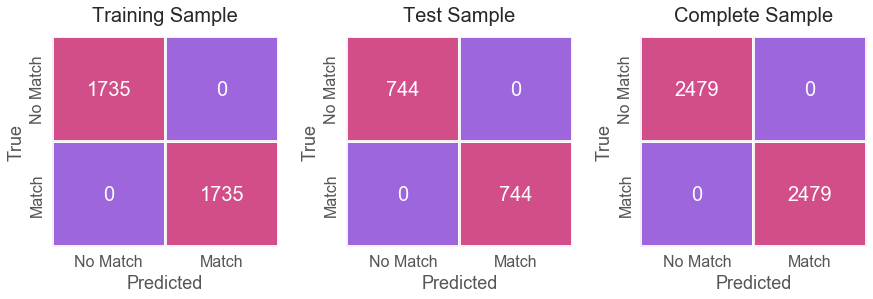

In [32]:
plt.style.use(['ggplot'])

fig, axes = plt.subplots(1,3, figsize=(12,3.5))
# plt.tight_layout(h_pad=2)
plt.tight_layout(w_pad=4.0)

colors=['red']

#cmap = sns.diverging_palette(280, 300, as_cmap=True) 
cmap = sns.diverging_palette(280, 350, as_cmap=True)
sns.heatmap(confusion1, annot=True, annot_kws={"size": 20},cmap=cmap,fmt='g', cbar=False,linewidths=2,ax=axes[0], alpha=.9)
# plt.xticks(rotation=0, fontsize=16)
# plt.yticks(fontsize=16)
axes[0].set_xticklabels(['No Match', 'Match'], fontsize=16)
axes[0].set_yticklabels(['Match', 'No Match'], fontsize=16)
axes[0].set_ylabel('True', fontsize=18)
axes[0].set_xlabel('Predicted', fontsize=18)
axes[0].set_title("Training Sample", fontsize=20, y=1.05)

sns.heatmap(confusion2, annot=True, annot_kws={"size": 20},cmap=cmap,fmt='g', cbar=False,linewidths=2,ax=axes[1], alpha=.9)
axes[1].set_xticklabels(['No Match', 'Match'], fontsize=16)
axes[1].set_yticklabels(['Match', 'No Match'], fontsize=16)
axes[1].set_ylabel('True', fontsize=18)
axes[1].set_xlabel('Predicted', fontsize=18)
axes[1].set_title("Test Sample", fontsize=20, y=1.05)

sns.heatmap(confusion3, annot=True, annot_kws={"size": 20},cmap=cmap,fmt='g',cbar=False,linewidths=2,ax=axes[2], alpha=.9)
axes[2].set_xticklabels(['No Match', 'Match'], fontsize=16)
axes[2].set_yticklabels(['Match', 'No Match'], fontsize=16)
axes[2].set_ylabel('True', fontsize=18)
axes[2].set_xlabel('Predicted', fontsize=18)
axes[2].set_title("Complete Sample", fontsize=20, y=1.05)

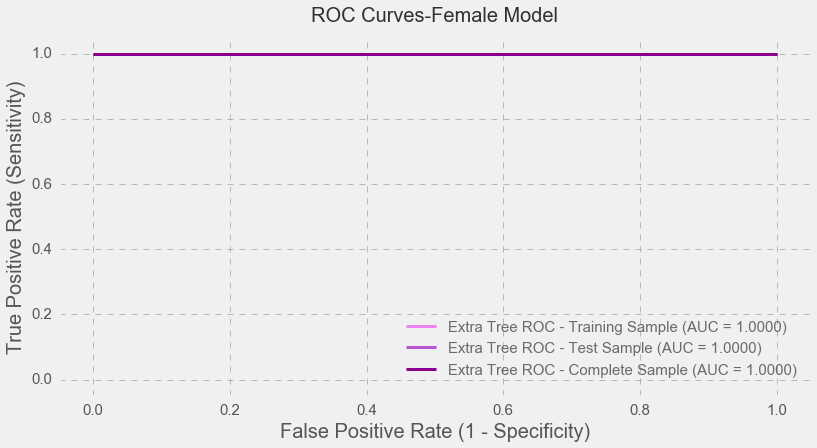

In [33]:


plt.style.use(['fivethirtyeight'])

plt.figure(figsize=(12,6))

y_pred_train1 = clf.predict_proba(X_train)[:,1]
y_pred_test1 = clf.predict_proba(X_test)[:,1]
y_pred_all1 = clf.predict_proba(X_resampled5)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_pred_train1)
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, y_pred_test1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_resampled5, y_pred_all1)


ROC_AUC = auc(fpr, tpr)
ROC_AUC1 = auc(fpr1, tpr1)
ROC_AUC2 = auc(fpr2, tpr2)



plt.plot(fpr, tpr, label='Extra Tree ROC - Training Sample (AUC = %0.4f)' % ROC_AUC,color='violet', linewidth=3)
plt.plot(fpr1, tpr1, label='Extra Tree ROC - Test Sample (AUC = %0.4f)' % ROC_AUC1, color='mediumorchid',linewidth=3)
plt.plot(fpr2, tpr2, label='Extra Tree ROC - Complete Sample (AUC = %0.4f)' % ROC_AUC2, color='darkmagenta',linewidth=3)


plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=20)
plt.ylabel('True Positive Rate (Sensitivity)',fontsize=20)
plt.grid(color='gray', linestyle='--', alpha=.5)

l=plt.legend(loc='lower right', fontsize=15,bbox_to_anchor=(1, 0.015))
for text in l.get_texts():
    text.set_color("dimgray")

plt.title('ROC Curves-Female Model', color="black", alpha=0.8,fontsize=20, y=1.03)
plt.show()